In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from tensorflow import keras

In [ ]:
!mkdir dataset

In [ ]:
!ls

dataset  drive	sample_data


In [ ]:
!cp drive/MyDrive/datasets/simpsond.zip /content/dataset/

In [ ]:
cd dataset/

/content/dataset


In [ ]:
!unzip simpsond.zip

In [ ]:
cd ..

/content


In [ ]:
train_data_dir = "/content/dataset/simpsond/train/simpsons_dataset"
batch_size = 32
IMG_HEIGHT = 224
IMG_WIDTH = 224

In [ ]:
# try another augment
train_datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    zoom_range=0.2,
    validation_split=0.2) # set validation split

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    batch_size=batch_size,
    shuffle = True,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    subset='training') # set as training data
validation_generator = train_datagen.flow_from_directory(
    train_data_dir,# same directory as training data
    batch_size=batch_size,
    shuffle = True,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    subset='validation') # set as validation data

Found 18093 images belonging to 42 classes.
Found 4503 images belonging to 42 classes.


In [ ]:
total_train = 18093
total_val = 4503

In [ ]:
sample_training_images, _ = next(train_generator)

In [ ]:
# plot 5 images

def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


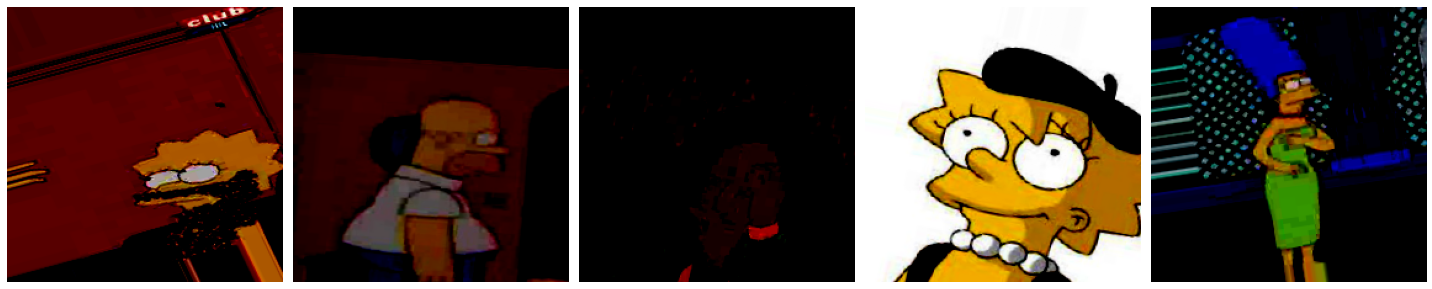

In [ ]:
plotImages(sample_training_images[:5])

In [ ]:
sample_training_images.shape

(32, 224, 224, 3)

In [ ]:
# model = tf.keras.Sequential([
#   efficient_net,
#   tf.keras.layers.GlobalAveragePooling2D(),
#   tf.keras.layers.Dense(640,kernel_regularizer=keras.regularizers.l2(0.001), activation = 'relu'), ##
#   # tf.keras.layers.ReLU(max_value=6),
#   tf.keras.layers.Dropout(.4),
#   tf.keras.layers.Dense(240,kernel_regularizer=keras.regularizers.l2(0.001), activation = 'relu'), ##
#   # tf.keras.layers.ReLU(max_value=6),
#   tf.keras.layers.Dropout(.2),
#   tf.keras.layers.Dense(42, activation = 'softmax')])

In [ ]:
!cp /content/drive/MyDrive/tfsimpson/mobilenetv2/model_1/custommodelmobilenetv2simpsons.h5 /content # Copy saved model (model trained 25 epochs)

In [ ]:
model = keras.models.load_model('custommodelmobilenetv2simpsons.h5') # Load model + weights

In [ ]:
len(model.trainable_variables)

162

In [ ]:
for layer in model.layers[:3]: # Freeze mobileNet and 1 dense
  layer.trainable =  False
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Functi (None, 7, 7, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 640)               819840    
_________________________________________________________________
dropout (Dropout)            (None, 640)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 240)               153840    
_________________________________________________________________
dropout_1 (Dropout)          (None, 240)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 42)                1

In [ ]:
logit_batch = model(sample_training_images).numpy()

print("min logit:", logit_batch.min())
print("max logit:", logit_batch.max())
print()

print("Shape:", logit_batch.shape)

min logit: 1.613187e-20
max logit: 1.0

Shape: (32, 42)


In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0007),
              loss=keras.losses.CategoricalCrossentropy(),
              metrics=[tf.keras.metrics.CategoricalAccuracy()])

In [ ]:
#кол-во обучаемых переменных
len(model.trainable_variables)

4

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Functi (None, 7, 7, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 640)               819840    
_________________________________________________________________
dropout (Dropout)            (None, 640)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 240)               153840    
_________________________________________________________________
dropout_1 (Dropout)          (None, 240)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 42)                1

In [ ]:
epochs = 10

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=total_val // batch_size
)

Epoch 1/10
565/565 [==============================] - 289s 512ms/step - loss: 0.2538 - categorical_accuracy: 0.9606 - val_loss: 0.4154 - val_categorical_accuracy: 0.9272
Epoch 2/10
565/565 [==============================] - 282s 500ms/step - loss: 0.2303 - categorical_accuracy: 0.9663 - val_loss: 0.4122 - val_categorical_accuracy: 0.9248
Epoch 3/10
565/565 [==============================] - 278s 492ms/step - loss: 0.2289 - categorical_accuracy: 0.9667 - val_loss: 0.4218 - val_categorical_accuracy: 0.9232
Epoch 4/10
565/565 [==============================] - 274s 484ms/step - loss: 0.2344 - categorical_accuracy: 0.9656 - val_loss: 0.4191 - val_categorical_accuracy: 0.9279
Epoch 5/10
565/565 [==============================] - 272s 481ms/step - loss: 0.2357 - categorical_accuracy: 0.9654 - val_loss: 0.4045 - val_categorical_accuracy: 0.9277
Epoch 6/10
565/565 [==============================] - 271s 480ms/step - loss: 0.2273 - categorical_accuracy: 0.9656 - val_loss: 0.4166 - val_categoric

KeyError: ignored

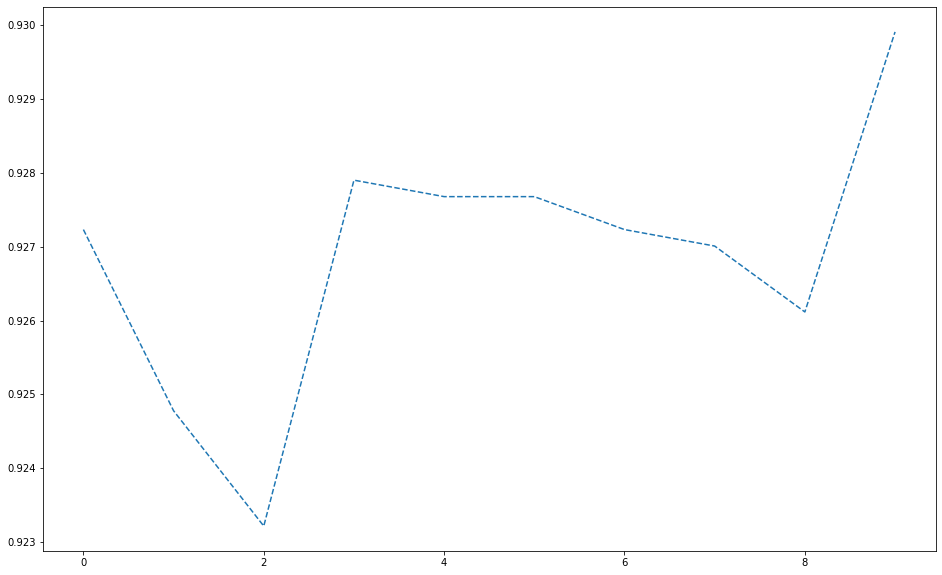

In [ ]:
## График loss 
def plot_history(histories, key='accuracy'):
  plt.figure(figsize=(16,10))

  for name, history in histories:
    val = plt.plot(history.epoch, history.history['val_categorical_'+key],
                   '--', label=name.title()+' Val')
    plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
             label=name.title()+' Train')

  plt.xlabel('Epochs')
  plt.ylabel(key.replace('_',' ').title())
  plt.legend()

  plt.xlim([0,max(history.epoch)])


plot_history([('baseline', history)])

In [ ]:
path_to_data = "/content/dataset/simpsond/train/simpsons_dataset"
labels_name = os.listdir(path_to_data)
labels_name.sort()
index_name = [i for i in range(0,len(labels_name))]
labels_dict = dict(zip(index_name, labels_name))

In [ ]:
def index_to_label(model, img_data_dir):
  image = tf.keras.preprocessing.image.load_img(img_data_dir,target_size = (IMG_HEIGHT, IMG_WIDTH))
  input_arr = keras.preprocessing.image.img_to_array(image)
  input_arr = tf.keras.applications.mobilenet_v2.preprocess_input(input_arr)
  input_arr = tf.reshape(input_arr , [1, 224, 224, 3])
  input = model(input_arr).numpy()
  predict = labels_dict[int(np.argmax(input, axis = 1))]
  return predict

In [ ]:
index_to_label(model,"/content/dataset/simpsond/testset/testset/img4.jpg")

'lisa_simpson'

In [ ]:
import os 
import shutil

In [ ]:
################ SUBMIT
import pandas as pd
from natsort import natsorted

In [ ]:
path_to_data = "/content/dataset/simpsond/testset/testset"
test_names = os.listdir(path_to_data)
test_names = natsorted(test_names)

In [ ]:
preds = []
for image_test in test_names:
  predict = index_to_label(model,"/content/dataset/simpsond/testset/testset/%s"%image_test)
  preds.append(predict)

In [ ]:
submit = pd.DataFrame(columns=['Id'])
submit['Id'] = test_name

In [ ]:
submit[f'Expected'] = preds
submit

,Id,Expected
0,img0.jpg,nelson_muntz
1,img1.jpg,bart_simpson
2,img2.jpg,mayor_quimby
3,img3.jpg,nelson_muntz
4,img4.jpg,lisa_simpson
...,...,...
986,img986.jpg,sideshow_bob
987,img987.jpg,nelson_muntz
988,img988.jpg,ned_flanders
989,img989.jpg,charles_montgomery_burns


In [ ]:
submit.to_csv('submission.csv', index=False) # Save file .csv

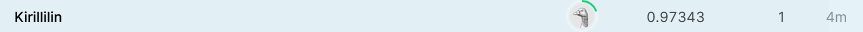